# CONTEÚDO DO FICHEIRO

**Ficheiro**: Neste ficheiro apresentamos um tratamento de dados semelhante ao que foi referido do relatório e no ficheiro 2 (sem normalização). Também apresentamos um tratamento de outliers onde fazemos a divisão entre os outliers e os dados sem outliers para a coluna AVERAGE_TIME_DIFF. Com esta divisão vamos modelar os dados sem outliers e com outliers e no final vamos juntar estes dois dataset para posteriormente fazer a previsão do dataset de teste.

# COMPETIÇÃO

O objetivo deste trabalho passa por desenvolver modelos de Machine Learning capaz de prever o fluxo de tráfego rodoviário, numa determinada hora, no Porto.
O modelo a desenvolver terá, na sua base, o tempo que se demora a percorrer as ruas da cidade do Porto num determinado ponto temporal (record_date); na temperatura, pressão atmosférica, humidade, precipitação e velocidade do vento, entre outras, que caracterizam um determinado ponto temporal.
Devem utilizar o modelo desenvolvido para prever, para cada registo do dataset de teste, o nível de trânsito correspondente.

**Resumo:** A partir do dataset de treino modelar o average speed diff de um carro segundo as condições presente nos restantes dados. O average speed diff pode ser None, Low, Medium, High, Very_high isto é, pode não haver trânsito (None) até haver muito trânsito (Very_high). De seguida, aplicar a modelação para determinar quais os valores de average speed diff para cada linha do dataset de teste e enviar uma submissão para determinar a acurácia. 

**Problema supervisionado de classificação** 

## IMPORTS

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomTreesEmbedding
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from scipy.stats import zscore
%matplotlib inline

## DATASET

O dataset de treino é constituido pelo os seguintes parâmetros:
- **city_name** - nome da cidade em causa;
- **record_date** - o timestamp associado ao registo;
- **average_speed_diff** - a diferença de velocidade corresponde à diferença entre (1.) a velocidade máxima que os carros podem atingir em cenários sem trânsito e (2.) a velocidade que realmente se verifica. Quanto mais alto o valor, maior é a diferença entre o que se está a andar no momento e o que se deveria estar a andar sem trânsito, i.e., valores altos deste atributo implicam que se está a andar mais devagar;
- **average_free_flow_speed** - o valor médio da velocidade máxima que os carros podem atingir em cenários sem trânsito;
- **average_time_diff** - o valor médio da diferença do tempo que se demora a percorrer um determinado conjunto de ruas. Quanto mais alto o valor maior é a diferença entre o tempo que demora para se percorrer as ruas e o que se deveria demorar sem trânsito, i.e., valores altos implicam que se está a demorar mais tempo a atravessar o conjunto de ruas;
- **average_free_flow_time** - o valor médio do tempo que demora a percorrer um determinado conjunto de ruas quando não há trânsito;
- **luminosity** - o nível de luminosidade que se verificava na cidade do Porto;
- **average_temperature** - o valor médio da temperatura para o record_date na cidade do Porto;
- **average_atmosp_pressure** - o valor médio da pressão atmosférica para o record_date;
- **average_humidity** - o valor médio da humidade para o record_date;
- **average_wind_speed** - o valor médio da velocidade do vento para o record_date;
- **average_cloudiness** - o valor médio da percentagem de nuvens para o record_date;
- **average_precipitation** - o valor médio de precipitação para o record_date;
- **average_rain** - avaliação qualitativa da precipitação para o record_date.

### VISUALIZAÇÃO DOS DADOS

In [2]:
sns.set_theme(palette="pastel")

In [3]:
traffic = pd.read_csv('training_data.csv')
test = pd.read_csv('test_data.csv')

In [4]:
traffic.head()

,city_name,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_PRECIPITATION,AVERAGE_RAIN
0,Porto,2019-08-29 07:00:00,Medium,41.5,11.5,71.4,LIGHT,15.0,1019.0,100.0,3.0,NaN,0.0,NaN
1,Porto,2018-08-10 14:00:00,High,41.7,48.3,87.4,LIGHT,21.0,1021.0,53.0,5.0,céu claro,0.0,NaN
2,Porto,2019-09-01 16:00:00,High,38.6,38.4,85.2,LIGHT,26.0,1014.0,61.0,4.0,NaN,0.0,NaN
3,Porto,2019-02-26 11:00:00,High,37.4,61.0,94.1,LIGHT,18.0,1025.0,48.0,4.0,céu claro,0.0,NaN
4,Porto,2019-06-06 12:00:00,Medium,41.6,50.4,77.0,LIGHT,15.0,1008.0,82.0,10.0,NaN,0.0,NaN


In [5]:
traffic.describe()

,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_PRECIPITATION
count,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.0
mean,40.661010,25.637111,81.143952,16.193482,1017.388139,80.084190,3.058573,0.0
std,4.119023,33.510507,8.294401,5.163492,5.751061,18.238863,2.138421,0.0
min,30.500000,0.000000,46.400000,0.000000,985.000000,14.000000,0.000000,0.0
25%,37.600000,2.275000,75.400000,13.000000,1015.000000,69.750000,1.000000,0.0
50%,40.700000,12.200000,82.400000,16.000000,1017.000000,83.000000,3.000000,0.0
75%,43.500000,36.200000,87.400000,19.000000,1021.000000,93.000000,4.000000,0.0
max,55.900000,296.500000,112.000000,35.000000,1033.000000,100.000000,14.000000,0.0


In [6]:
test.describe()

,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_PRECIPITATION
count,1500.0000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.0
mean,40.8304,26.750533,81.194333,16.104000,1017.457333,80.734000,3.116667,0.0
std,4.2396,34.089866,8.189691,5.094293,5.840455,17.729358,2.198699,0.0
min,31.0000,0.000000,48.100000,1.000000,985.000000,14.000000,0.000000,0.0
25%,37.5000,2.500000,75.800000,13.000000,1015.000000,72.000000,1.000000,0.0
50%,41.0000,12.600000,82.300000,16.000000,1018.000000,86.000000,3.000000,0.0
75%,43.9000,40.225000,87.600000,19.000000,1021.000000,93.000000,4.000000,0.0
max,56.2000,232.300000,106.100000,32.000000,1033.000000,100.000000,13.000000,0.0


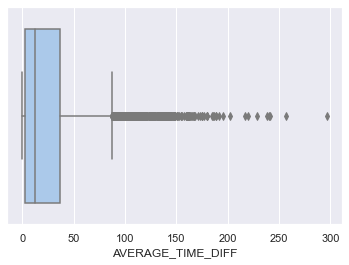

In [7]:
ax = sns.boxplot(x=traffic["AVERAGE_TIME_DIFF"])

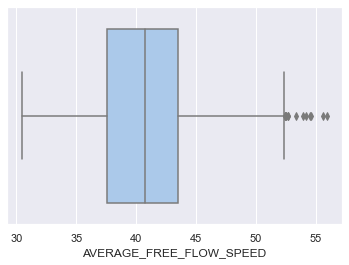

In [8]:
ax = sns.boxplot(x=traffic["AVERAGE_FREE_FLOW_SPEED"])

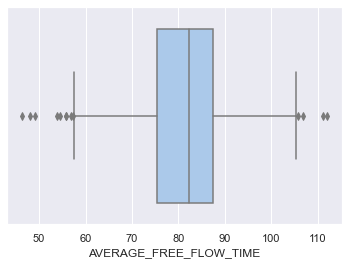

In [9]:
ax = sns.boxplot(x=traffic["AVERAGE_FREE_FLOW_TIME"])

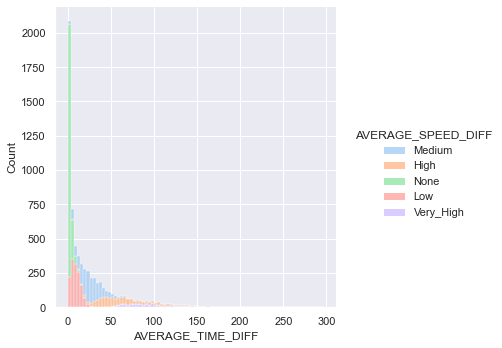

In [10]:
sns.displot(data=traffic, x="AVERAGE_TIME_DIFF", hue="AVERAGE_SPEED_DIFF", multiple="stack")

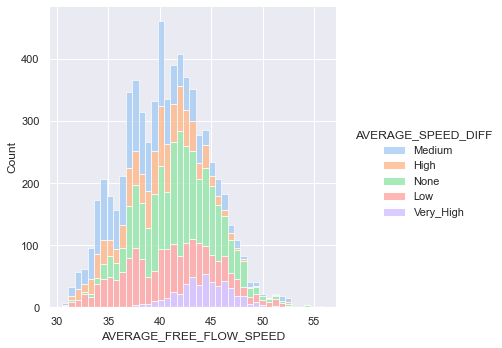

In [11]:
sns.displot(data=traffic, x="AVERAGE_FREE_FLOW_SPEED", hue="AVERAGE_SPEED_DIFF", multiple="stack")

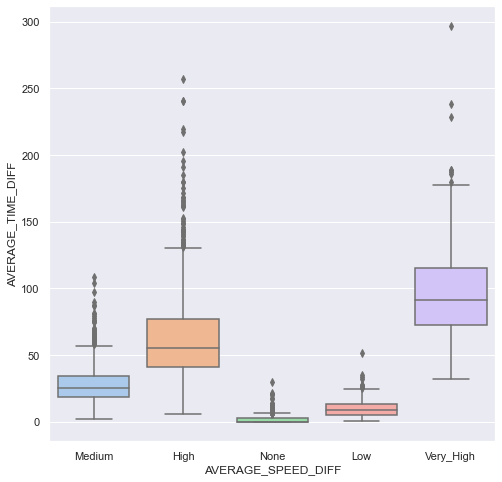

In [12]:
plt.subplots(figsize=(8,8))
ax = sns.boxplot(x=traffic["AVERAGE_SPEED_DIFF"], y=traffic["AVERAGE_TIME_DIFF"])

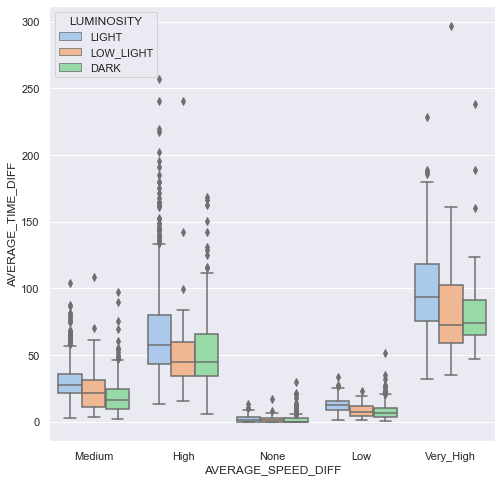

In [13]:
plt.subplots(figsize=(8,8))
ax = sns.boxplot(x=traffic["AVERAGE_SPEED_DIFF"], y=traffic["AVERAGE_TIME_DIFF"], hue=traffic['LUMINOSITY'])

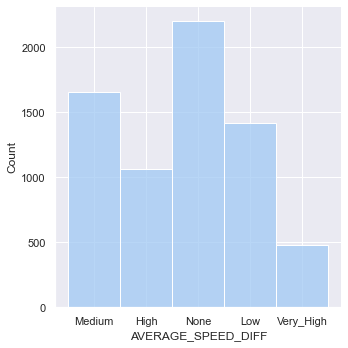

In [14]:
sns.displot(traffic["AVERAGE_SPEED_DIFF"])

In [15]:
traffic.groupby('AVERAGE_SPEED_DIFF')['AVERAGE_TIME_DIFF'].mean() # obter a média dos valores

AVERAGE_SPEED_DIFF
High         63.801505
Low           9.305144
Medium       26.654694
None          1.593545
Very_High    96.246973
Name: AVERAGE_TIME_DIFF, dtype: float64

In [16]:
traffic

,city_name,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_PRECIPITATION,AVERAGE_RAIN
0,Porto,2019-08-29 07:00:00,Medium,41.5,11.5,71.4,LIGHT,15.0,1019.0,100.0,3.0,NaN,0.0,NaN
1,Porto,2018-08-10 14:00:00,High,41.7,48.3,87.4,LIGHT,21.0,1021.0,53.0,5.0,céu claro,0.0,NaN
2,Porto,2019-09-01 16:00:00,High,38.6,38.4,85.2,LIGHT,26.0,1014.0,61.0,4.0,NaN,0.0,NaN
3,Porto,2019-02-26 11:00:00,High,37.4,61.0,94.1,LIGHT,18.0,1025.0,48.0,4.0,céu claro,0.0,NaN
4,Porto,2019-06-06 12:00:00,Medium,41.6,50.4,77.0,LIGHT,15.0,1008.0,82.0,10.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6807,Porto,2019-02-23 09:00:00,Low,41.2,3.7,86.9,LIGHT,9.0,1030.0,71.0,4.0,céu claro,0.0,NaN
6808,Porto,2019-06-08 18:00:00,Medium,38.9,51.9,76.9,LIGHT,17.0,1020.0,63.0,6.0,NaN,0.0,NaN
6809,Porto,2018-10-02 04:00:00,None,39.6,0.0,89.1,DARK,15.0,1020.0,39.0,4.0,céu claro,0.0,NaN
6810,Porto,2019-01-30 01:00:00,None,41.6,0.0,85.5,DARK,8.0,1018.0,81.0,1.0,algumas nuvens,0.0,NaN


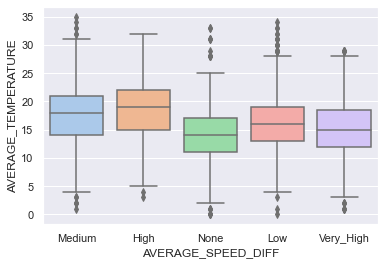

In [17]:
ax = sns.boxplot(x=traffic["AVERAGE_SPEED_DIFF"], y=traffic["AVERAGE_TEMPERATURE"])

In [18]:
median = traffic["AVERAGE_TIME_DIFF"].mean()
median

25.637110980622403

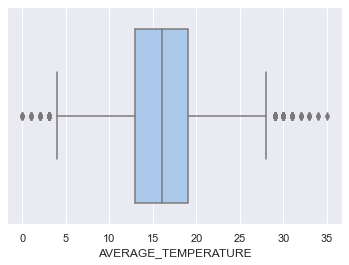

In [19]:
ax = sns.boxplot(x=traffic["AVERAGE_TEMPERATURE"])

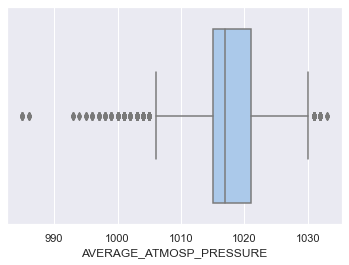

In [20]:
ax = sns.boxplot(x=traffic["AVERAGE_ATMOSP_PRESSURE"])

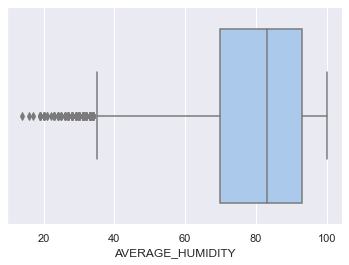

In [21]:
ax = sns.boxplot(x=traffic["AVERAGE_HUMIDITY"])

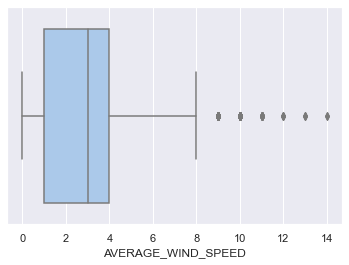

In [22]:
ax = sns.boxplot(x=traffic["AVERAGE_WIND_SPEED"])

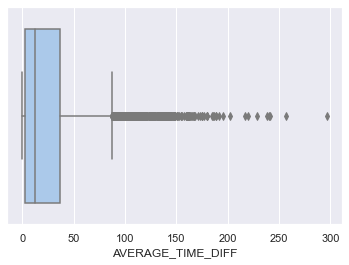

In [23]:
ax = sns.boxplot(x=traffic["AVERAGE_TIME_DIFF"])

<AxesSubplot:xlabel='AVERAGE_TIME_DIFF', ylabel='Count'>

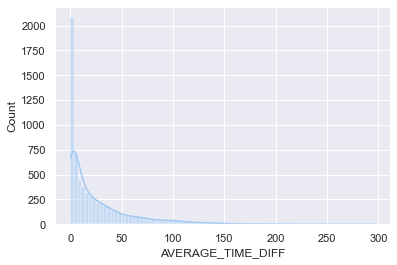

In [24]:
sns.histplot(traffic["AVERAGE_TIME_DIFF"],kde=True)

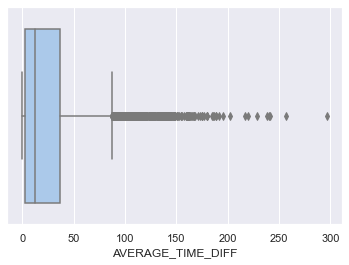

In [25]:
ax = sns.boxplot(x=traffic["AVERAGE_TIME_DIFF"])

<AxesSubplot:xlabel='AVERAGE_SPEED_DIFF', ylabel='Count'>

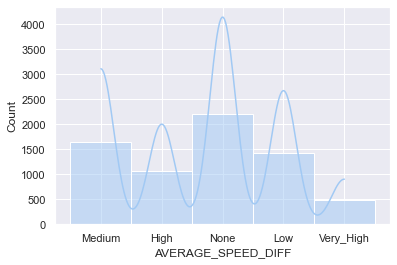

In [26]:
sns.histplot(traffic['AVERAGE_SPEED_DIFF'],kde=True)

<AxesSubplot:xlabel='AVERAGE_ATMOSP_PRESSURE', ylabel='Count'>

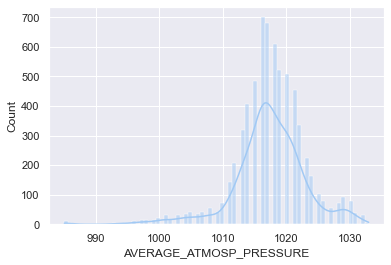

In [27]:
sns.histplot(traffic['AVERAGE_ATMOSP_PRESSURE'],kde=True)

<AxesSubplot:xlabel='AVERAGE_HUMIDITY', ylabel='Count'>

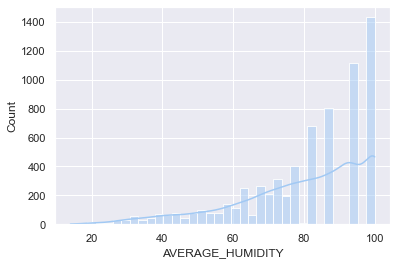

In [28]:
sns.histplot(traffic['AVERAGE_HUMIDITY'],kde=True)

<AxesSubplot:xlabel='AVERAGE_TEMPERATURE', ylabel='Count'>

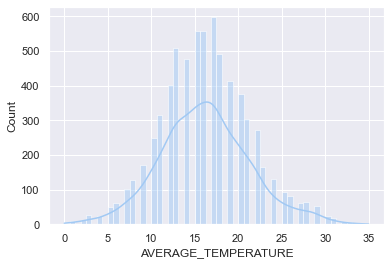

In [29]:
sns.histplot(traffic['AVERAGE_TEMPERATURE'],kde=True)

<AxesSubplot:xlabel='LUMINOSITY', ylabel='Count'>

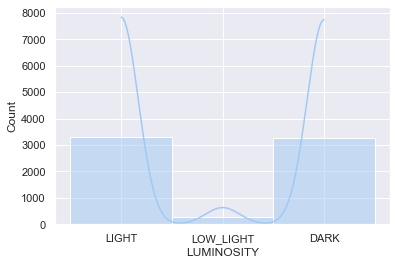

In [30]:
sns.histplot(traffic['LUMINOSITY'],kde=True)

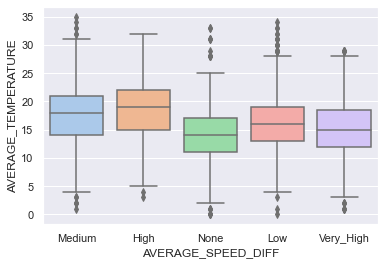

In [31]:
ax = sns.boxplot(x=traffic["AVERAGE_SPEED_DIFF"], y=traffic["AVERAGE_TEMPERATURE"])

In [32]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city_name                6812 non-null   object 
 1   record_date              6812 non-null   object 
 2   AVERAGE_SPEED_DIFF       6812 non-null   object 
 3   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64
 4   AVERAGE_TIME_DIFF        6812 non-null   float64
 5   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64
 6   LUMINOSITY               6812 non-null   object 
 7   AVERAGE_TEMPERATURE      6812 non-null   float64
 8   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64
 9   AVERAGE_HUMIDITY         6812 non-null   float64
 10  AVERAGE_WIND_SPEED       6812 non-null   float64
 11  AVERAGE_CLOUDINESS       4130 non-null   object 
 12  AVERAGE_PRECIPITATION    6812 non-null   float64
 13  AVERAGE_RAIN             563 non-null    object 
dtypes: float64(8), object(6)

In [33]:
# None = 0, Low = 1, Medium = 2, High = 3, Very_High = 4
traffic['AVERAGE_SPEED_DIFF'].value_counts()

None         2200
Medium       1651
Low          1419
High         1063
Very_High     479
Name: AVERAGE_SPEED_DIFF, dtype: int64

In [34]:
traffic['LUMINOSITY'].value_counts()

LIGHT        3293
DARK         3253
LOW_LIGHT     266
Name: LUMINOSITY, dtype: int64

In [35]:
traffic['AVERAGE_CLOUDINESS'].value_counts()

céu claro            1582
céu pouco nublado     516
nuvens dispersas      459
nuvens quebrados      448
algumas nuvens        422
nuvens quebradas      416
céu limpo             153
tempo nublado          67
nublado                67
Name: AVERAGE_CLOUDINESS, dtype: int64

In [36]:
traffic['AVERAGE_RAIN'].value_counts()

chuva fraca                    261
chuva moderada                 153
chuva leve                      45
aguaceiros fracos               38
chuva                           30
aguaceiros                      11
chuva forte                      8
trovoada com chuva leve          7
chuvisco fraco                   5
chuva de intensidade pesado      2
chuva de intensidade pesada      1
trovoada com chuva               1
chuvisco e chuva fraca           1
Name: AVERAGE_RAIN, dtype: int64

In [37]:
print(traffic[traffic.duplicated()]) # Verifica se e quais são os valores duplicados

Empty DataFrame
Columns: [city_name, record_date, AVERAGE_SPEED_DIFF, AVERAGE_FREE_FLOW_SPEED, AVERAGE_TIME_DIFF, AVERAGE_FREE_FLOW_TIME, LUMINOSITY, AVERAGE_TEMPERATURE, AVERAGE_ATMOSP_PRESSURE, AVERAGE_HUMIDITY, AVERAGE_WIND_SPEED, AVERAGE_CLOUDINESS, AVERAGE_PRECIPITATION, AVERAGE_RAIN]
Index: []


In [38]:
traffic.isna().any() # Verifica se há valores nulos no dataset

city_name                  False
record_date                False
AVERAGE_SPEED_DIFF         False
AVERAGE_FREE_FLOW_SPEED    False
AVERAGE_TIME_DIFF          False
AVERAGE_FREE_FLOW_TIME     False
LUMINOSITY                 False
AVERAGE_TEMPERATURE        False
AVERAGE_ATMOSP_PRESSURE    False
AVERAGE_HUMIDITY           False
AVERAGE_WIND_SPEED         False
AVERAGE_CLOUDINESS          True
AVERAGE_PRECIPITATION      False
AVERAGE_RAIN                True
dtype: bool

In [39]:
print(traffic.isna().sum()) # Contagem dos valores em falta do dataset 

city_name                     0
record_date                   0
AVERAGE_SPEED_DIFF            0
AVERAGE_FREE_FLOW_SPEED       0
AVERAGE_TIME_DIFF             0
AVERAGE_FREE_FLOW_TIME        0
LUMINOSITY                    0
AVERAGE_TEMPERATURE           0
AVERAGE_ATMOSP_PRESSURE       0
AVERAGE_HUMIDITY              0
AVERAGE_WIND_SPEED            0
AVERAGE_CLOUDINESS         2682
AVERAGE_PRECIPITATION         0
AVERAGE_RAIN               6249
dtype: int64


In [40]:
traffic.groupby('AVERAGE_HUMIDITY').mean()

,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_WIND_SPEED,AVERAGE_PRECIPITATION
AVERAGE_HUMIDITY,,,,,,,
14.0,40.500000,32.800000,88.300000,28.000000,1020.000000,4.000000,0.0
16.0,37.400000,23.000000,89.300000,27.000000,1022.000000,2.000000,0.0
17.0,42.800000,23.400000,82.000000,28.000000,1020.000000,5.000000,0.0
19.0,37.357143,30.600000,77.128571,27.714286,1018.428571,4.571429,0.0
20.0,38.362500,27.950000,78.987500,27.125000,1018.750000,4.125000,0.0
...,...,...,...,...,...,...,...
93.0,41.578293,18.554731,79.345455,13.797774,1016.843228,2.582560,0.0
94.0,39.929730,37.640541,85.486486,20.540541,1015.864865,3.027027,0.0
96.0,46.433333,54.966667,74.533333,11.000000,985.666667,0.666667,0.0


In [41]:
traffic['AVERAGE_PRECIPITATION'].value_counts()

0.0    6812
Name: AVERAGE_PRECIPITATION, dtype: int64

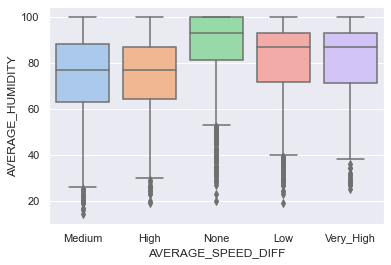

In [42]:
ax = sns.boxplot(x=traffic["AVERAGE_SPEED_DIFF"], y=traffic["AVERAGE_HUMIDITY"])

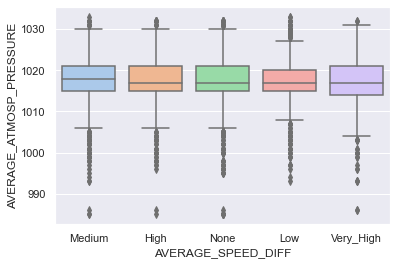

In [43]:
ax = sns.boxplot(x=traffic["AVERAGE_SPEED_DIFF"], y=traffic["AVERAGE_ATMOSP_PRESSURE"])

In [44]:
traffic

,city_name,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_PRECIPITATION,AVERAGE_RAIN
0,Porto,2019-08-29 07:00:00,Medium,41.5,11.5,71.4,LIGHT,15.0,1019.0,100.0,3.0,NaN,0.0,NaN
1,Porto,2018-08-10 14:00:00,High,41.7,48.3,87.4,LIGHT,21.0,1021.0,53.0,5.0,céu claro,0.0,NaN
2,Porto,2019-09-01 16:00:00,High,38.6,38.4,85.2,LIGHT,26.0,1014.0,61.0,4.0,NaN,0.0,NaN
3,Porto,2019-02-26 11:00:00,High,37.4,61.0,94.1,LIGHT,18.0,1025.0,48.0,4.0,céu claro,0.0,NaN
4,Porto,2019-06-06 12:00:00,Medium,41.6,50.4,77.0,LIGHT,15.0,1008.0,82.0,10.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6807,Porto,2019-02-23 09:00:00,Low,41.2,3.7,86.9,LIGHT,9.0,1030.0,71.0,4.0,céu claro,0.0,NaN
6808,Porto,2019-06-08 18:00:00,Medium,38.9,51.9,76.9,LIGHT,17.0,1020.0,63.0,6.0,NaN,0.0,NaN
6809,Porto,2018-10-02 04:00:00,None,39.6,0.0,89.1,DARK,15.0,1020.0,39.0,4.0,céu claro,0.0,NaN
6810,Porto,2019-01-30 01:00:00,None,41.6,0.0,85.5,DARK,8.0,1018.0,81.0,1.0,algumas nuvens,0.0,NaN


### EXPLORAÇÃO DO DATASET

##### TRATAMENTO DE VALORES CATEGÓRICOS

In [45]:
#tratamento de average_speed_diff, luminosity
traffic["AVERAGE_SPEED_DIFF"] = traffic['AVERAGE_SPEED_DIFF'].replace({'None' : 0, 'Low' : 1, 'Medium' : 2, 'High' : 3, 'Very_High' : 4}).astype(int)
traffic["LUMINOSITY"] = traffic['LUMINOSITY'].replace({'DARK' : 0, 'LOW_LIGHT' : 1, 'LIGHT' : 2}).astype(int)

test["LUMINOSITY"] = test['LUMINOSITY'].replace({'DARK' : 0, 'LOW_LIGHT' : 1, 'LIGHT' : 2}).astype(int)

test.head()
traffic.head()

,city_name,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_PRECIPITATION,AVERAGE_RAIN
0,Porto,2019-08-29 07:00:00,2,41.5,11.5,71.4,2,15.0,1019.0,100.0,3.0,NaN,0.0,NaN
1,Porto,2018-08-10 14:00:00,3,41.7,48.3,87.4,2,21.0,1021.0,53.0,5.0,céu claro,0.0,NaN
2,Porto,2019-09-01 16:00:00,3,38.6,38.4,85.2,2,26.0,1014.0,61.0,4.0,NaN,0.0,NaN
3,Porto,2019-02-26 11:00:00,3,37.4,61.0,94.1,2,18.0,1025.0,48.0,4.0,céu claro,0.0,NaN
4,Porto,2019-06-06 12:00:00,2,41.6,50.4,77.0,2,15.0,1008.0,82.0,10.0,NaN,0.0,NaN


In [46]:
#lumi = pd.get_dummies(traffic['LUMINOSITY'],drop_first=True)
#traffic.drop(['LUMINOSITY'],axis=1,inplace=True)
#traffic = pd.concat([traffic,lumi],axis=1)

##### REMOÇÃO DE COLUNAS

In [47]:
traffic.record_date = pd.to_datetime(traffic.record_date)
#traffic.info()

test.record_date = pd.to_datetime(test.record_date)
#test.info()

In [48]:
traffic = traffic.drop(['city_name'], axis=1)
traffic = traffic.drop(['AVERAGE_PRECIPITATION'], axis=1)
traffic = traffic.drop(['AVERAGE_CLOUDINESS'], axis=1)
traffic = traffic.drop(['AVERAGE_RAIN'], axis=1)
traffic = traffic.drop(['AVERAGE_HUMIDITY'], axis=1)

test = test.drop(['city_name'], axis=1)
test = test.drop(['AVERAGE_PRECIPITATION'], axis=1)
test = test.drop(['AVERAGE_CLOUDINESS'], axis=1)
test = test.drop(['AVERAGE_RAIN'], axis=1)
test = test.drop(['AVERAGE_HUMIDITY'], axis=1)

##### CRIAÇÃO DE FEATURES - DATA DA OBSERVAÇÃO

In [49]:
traffic['Month'] = traffic.record_date.dt.month
traffic['Hour'] = traffic.record_date.dt.hour
traffic['Day'] = traffic.record_date.dt.day_name()
#traffic['Day'] = traffic['Day'].replace({'Sunday' : 1, 'Monday' : 2, 'Tuesday' : 3, 'Wednesday' : 4, 'Thursday' : 5,'Friday' : 6,'Saturday' : 7}).astype(int)
traffic['Day'] = traffic['Day'].replace({'Sunday' : 1, 'Monday' : 0, 'Tuesday' : 0, 'Wednesday' : 0, 'Thursday' : 0,'Friday' : 0,'Saturday' : 1}).astype(int)
traffic.head() #colocação da data emj formato por celula
traffic = traffic.drop(['record_date'], axis=1)


test['Month'] = test.record_date.dt.month
test['Hour'] = test.record_date.dt.hour
test['Day'] = test.record_date.dt.day_name()
test['Day'] = test['Day'].replace({'Sunday' : 1, 'Monday' : 0, 'Tuesday' : 0, 'Wednesday' : 0, 'Thursday' : 0,'Friday' : 0,'Saturday' : 1}).astype(int)
test.head() #colocação da data emj formato por celula
test = test.drop(['record_date'], axis=1)

##### VISUALIZAÇÃO

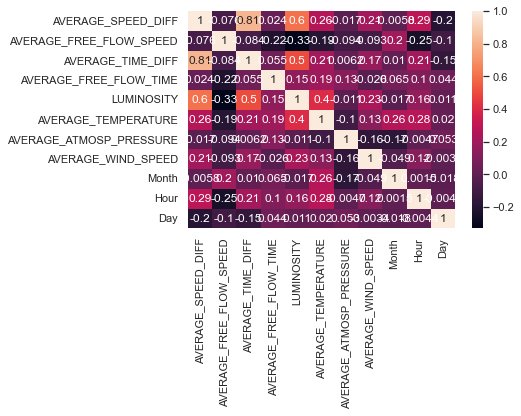

In [50]:
#matriz de correlação
# temperatura e humidade estao fortemente correlacionados podemos optar por retirar atributos
ax = sns.heatmap(traffic.corr(),annot=True)

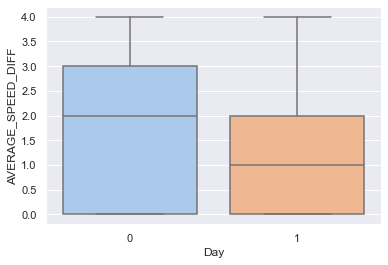

In [51]:
ax = sns.boxplot(y=traffic["AVERAGE_SPEED_DIFF"], x=traffic["Day"])

<AxesSubplot:xlabel='AVERAGE_SPEED_DIFF', ylabel='count'>

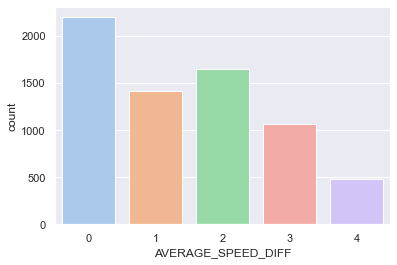

In [52]:
sns.countplot(x="AVERAGE_SPEED_DIFF",data=traffic)

<AxesSubplot:xlabel='Hour', ylabel='count'>

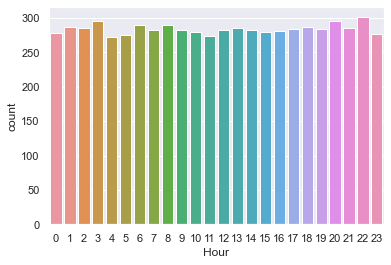

In [53]:
sns.countplot(x="Hour",data=traffic)

### Tratamento Outliers

In [54]:
def is_outlier(s): 
    lower_limit = s.mean() - (s.std() * 1)
    upper_limit = s.mean() + (s.std() * 1)
    return ~s.between(lower_limit, upper_limit)

#outliers = traffic.groupby('AVERAGE_SPEED_DIFF')['AVERAGE_TIME_DIFF'].apply(is_outlier) #v1
outliers = traffic['AVERAGE_TIME_DIFF'].transform(is_outlier) #v2

In [55]:
def is_outlier_test(s): 
    lower_limit = s.mean() - (s.std() * 1)
    upper_limit = s.mean() + (s.std() * 1)
    return ~s.between(lower_limit, upper_limit)

outliers_test = test['AVERAGE_TIME_DIFF'].transform(is_outlier)
#outliers_test

In [56]:
mask = outliers == True
traffic_outliers = traffic[mask] # dataset com outliers
traffic_s_outliers = traffic[~mask] # dataset sem outliers

In [57]:
mask1 = outliers_test == True
test_outliers = test[mask1] # dataset com outliers
test_s_outliers = test[~mask1] # dataset sem outliers

In [58]:
x_c_out = traffic_outliers.drop(['AVERAGE_SPEED_DIFF'], axis=1)
y_c_out = traffic_outliers['AVERAGE_SPEED_DIFF'].to_frame()
x_c_out

,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_WIND_SPEED,Month,Hour,Day
3,37.4,61.0,94.1,2,18.0,1025.0,4.0,2,11,0
24,43.1,113.5,86.2,2,22.0,1011.0,7.0,8,18,0
27,33.8,136.9,93.6,2,20.0,1019.0,3.0,8,12,0
41,46.0,131.7,61.5,2,16.0,1015.0,3.0,6,8,0
44,42.9,63.6,85.6,2,20.0,1018.0,2.0,9,18,0
...,...,...,...,...,...,...,...,...,...,...
6781,37.8,66.7,70.4,2,28.0,1020.0,6.0,5,15,1
6783,40.7,106.0,81.6,2,21.0,1021.0,2.0,9,16,0
6794,48.1,87.9,76.2,2,11.0,1025.0,6.0,2,8,0
6797,40.5,74.2,78.0,0,8.0,1018.0,3.0,1,18,0


In [59]:
x_s_out = traffic_s_outliers.drop(['AVERAGE_SPEED_DIFF'], axis=1)
y_s_out = traffic_s_outliers['AVERAGE_SPEED_DIFF'].to_frame()
x_s_out

,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_WIND_SPEED,Month,Hour,Day
0,41.5,11.5,71.4,2,15.0,1019.0,3.0,8,7,0
1,41.7,48.3,87.4,2,21.0,1021.0,5.0,8,14,0
2,38.6,38.4,85.2,2,26.0,1014.0,4.0,9,16,1
4,41.6,50.4,77.0,2,15.0,1008.0,10.0,6,12,0
5,52.4,5.6,68.5,1,13.0,1014.0,4.0,11,7,0
...,...,...,...,...,...,...,...,...,...,...
6807,41.2,3.7,86.9,2,9.0,1030.0,4.0,2,9,1
6808,38.9,51.9,76.9,2,17.0,1020.0,6.0,6,18,1
6809,39.6,0.0,89.1,0,15.0,1020.0,4.0,10,4,0
6810,41.6,0.0,85.5,0,8.0,1018.0,1.0,1,1,0


##### APLICAÇÃO DO MODELO

In [60]:
clf = RandomForestClassifier(n_estimators=500, random_state=2021,criterion="entropy")
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_c_out,np.ravel(y_c_out))

predictions = clf.predict(test_outliers)
predictions

array([3, 3, 4, 4, 3, 4, 3, 3, 4, 3, 3, 3, 4, 3, 4, 4, 4, 3, 3, 4, 3, 4,
       4, 3, 3, 4, 3, 4, 4, 3, 3, 3, 3, 3, 4, 3, 4, 4, 3, 3, 4, 4, 4, 3,
       4, 3, 3, 4, 4, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 4, 3, 3, 4, 4,
       3, 4, 3, 4, 4, 3, 3, 4, 3, 3, 3, 4, 3, 4, 4, 3, 4, 4, 3, 4, 4, 3,
       4, 4, 4, 3, 4, 4, 3, 3, 3, 3, 3, 4, 4, 3, 4, 4, 3, 3, 3, 3, 4, 3,
       3, 3, 4, 4, 4, 4, 4, 3, 3, 4, 4, 3, 4, 3, 3, 3, 3, 3, 4, 3, 4, 4,
       3, 3, 3, 4, 3, 3, 3, 3, 4, 4, 4, 4, 3, 4, 4, 4, 3, 3, 3, 3, 4, 3,
       3, 4, 4, 4, 3, 4, 4, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 3, 4, 3, 4, 3, 2, 4, 3, 3, 4, 3, 4, 3, 4, 4, 3, 3,
       4, 3, 3, 4])

In [61]:
clf1 = RandomForestClassifier(n_estimators=500, random_state=2021,criterion="entropy")
#Train the model using the training sets y_pred=clf.predict(X_test)
clf1.fit(x_s_out,np.ravel(y_s_out))

predictions1 = clf1.predict(test_s_outliers)
predictions1

array([0, 2, 0, ..., 0, 0, 1])

In [62]:
test_outliers["Speed_Diff"] = predictions.tolist()
test_outliers

C:\Users\ANALUS~1\AppData\Local\Temp/ipykernel_15568/2152955604.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_outliers["Speed_Diff"] = predictions.tolist()


,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_WIND_SPEED,Month,Hour,Day,Speed_Diff
15,34.2,61.8,68.8,2,16.0,1014.0,6.0,5,14,0,3
29,37.9,102.6,88.8,2,20.0,1015.0,3.0,10,15,0,3
32,42.4,110.1,86.1,2,14.0,1018.0,3.0,10,8,0,4
43,41.5,114.1,72.4,2,21.0,1015.0,5.0,5,17,0,4
52,34.6,77.1,90.9,2,12.0,1019.0,3.0,1,17,1,3
...,...,...,...,...,...,...,...,...,...,...,...
1460,33.6,64.6,76.9,2,30.0,1020.0,3.0,5,15,0,3
1467,40.6,76.6,80.8,2,4.0,1022.0,4.0,2,9,0,4
1479,39.4,126.0,89.1,2,20.0,1016.0,3.0,8,11,0,3
1481,37.9,61.2,65.4,0,16.0,1018.0,2.0,6,2,1,3


In [63]:
test_s_outliers["Speed_Diff"] = predictions1.tolist()
test_s_outliers

C:\Users\ANALUS~1\AppData\Local\Temp/ipykernel_15568/4048543594.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_s_outliers["Speed_Diff"] = predictions1.tolist()


,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_WIND_SPEED,Month,Hour,Day,Speed_Diff
0,39.2,0.0,91.0,0,8.0,1026.0,1.0,2,23,0,0
1,42.5,12.2,76.8,0,11.0,1020.0,4.0,11,20,0,2
2,45.9,0.0,86.3,0,14.0,1017.0,0.0,8,5,0,0
3,33.2,51.7,89.9,2,22.0,1016.0,4.0,7,17,1,3
4,44.0,3.5,85.5,0,12.0,1004.0,9.0,10,6,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1494,44.0,37.0,69.1,2,20.0,1017.0,8.0,6,17,0,3
1495,50.2,1.1,80.5,0,11.0,1013.0,5.0,11,5,1,1
1496,38.0,4.6,85.6,0,9.0,1028.0,0.0,3,2,0,0
1497,43.8,0.0,80.4,0,16.0,1013.0,1.0,9,1,0,0


In [64]:
pred = pd.concat([test_outliers,test_s_outliers])
pred

,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_WIND_SPEED,Month,Hour,Day,Speed_Diff
15,34.2,61.8,68.8,2,16.0,1014.0,6.0,5,14,0,3
29,37.9,102.6,88.8,2,20.0,1015.0,3.0,10,15,0,3
32,42.4,110.1,86.1,2,14.0,1018.0,3.0,10,8,0,4
43,41.5,114.1,72.4,2,21.0,1015.0,5.0,5,17,0,4
52,34.6,77.1,90.9,2,12.0,1019.0,3.0,1,17,1,3
...,...,...,...,...,...,...,...,...,...,...,...
1494,44.0,37.0,69.1,2,20.0,1017.0,8.0,6,17,0,3
1495,50.2,1.1,80.5,0,11.0,1013.0,5.0,11,5,1,1
1496,38.0,4.6,85.6,0,9.0,1028.0,0.0,3,2,0,0
1497,43.8,0.0,80.4,0,16.0,1013.0,1.0,9,1,0,0


In [65]:
pred = pred.sort_index()

In [66]:
pred = pred['Speed_Diff'].to_numpy()
pred

array([0, 2, 0, ..., 0, 4, 1], dtype=int64)

In [67]:
predictions

array([3, 3, 4, 4, 3, 4, 3, 3, 4, 3, 3, 3, 4, 3, 4, 4, 4, 3, 3, 4, 3, 4,
       4, 3, 3, 4, 3, 4, 4, 3, 3, 3, 3, 3, 4, 3, 4, 4, 3, 3, 4, 4, 4, 3,
       4, 3, 3, 4, 4, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 4, 3, 3, 4, 4,
       3, 4, 3, 4, 4, 3, 3, 4, 3, 3, 3, 4, 3, 4, 4, 3, 4, 4, 3, 4, 4, 3,
       4, 4, 4, 3, 4, 4, 3, 3, 3, 3, 3, 4, 4, 3, 4, 4, 3, 3, 3, 3, 4, 3,
       3, 3, 4, 4, 4, 4, 4, 3, 3, 4, 4, 3, 4, 3, 3, 3, 3, 3, 4, 3, 4, 4,
       3, 3, 3, 4, 3, 3, 3, 3, 4, 4, 4, 4, 3, 4, 4, 4, 3, 3, 3, 3, 4, 3,
       3, 4, 4, 4, 3, 4, 4, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 3, 4, 3, 4, 3, 2, 4, 3, 3, 4, 3, 4, 3, 4, 4, 3, 3,
       4, 3, 3, 4])

### CRIAÇÃO DO FICHEIRO SUBMISSÃO

In [68]:
'''
# acrescentar headers
#submission = pd.DataFrame(predictions_Booster, columns = ["Speed_Diff"])
submission = pd.DataFrame(pred, columns = ["Speed_Diff"])
submission.insert(0, "RowId", range(1,1501), True)

#transformação dos valores para formato escrito
submission['Speed_Diff']= submission['Speed_Diff'].replace({0 : 'None', 1 : 'Low', 2 : 'Medium', 3 : 'High', 4 : 'Very_High'})

#passagem para ficheiro csv
submission.to_csv('Submission.csv', index=False)

submission
'''

'\n# acrescentar headers\n#submission = pd.DataFrame(predictions_Booster, columns = ["Speed_Diff"])\nsubmission = pd.DataFrame(pred, columns = ["Speed_Diff"])\nsubmission.insert(0, "RowId", range(1,1501), True)\n\n#transformação dos valores para formato escrito\nsubmission[\'Speed_Diff\']= submission[\'Speed_Diff\'].replace({0 : \'None\', 1 : \'Low\', 2 : \'Medium\', 3 : \'High\', 4 : \'Very_High\'})\n\n#passagem para ficheiro csv\nsubmission.to_csv(\'Submission.csv\', index=False)\n\nsubmission\n'